In [1]:
import numpy as np
import sympy as sym
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [2]:
#システムパラメータを与える
A = np.array([[0.0, 1.0],　[-6.0,-5.0]])　#行列A
b = np.array([[0.0], [1.0]])　#ベクトルb
c = np.array([[1.0, 0.0]])　#ベクトルc
d = 0　#スカラーd
observer_poles1=[-1,-2] #オブザーバの極
h1 = matlab.place(A.T, c.T, observer_poles1).T　#オブザーバゲインを求める
Ah1 = A - h1*c  #Ah = A-hcの計算

In [3]:
poles = [-5.0, -6.0] #閉ループシステムの極の指定
f = matlab.place(A, b, poles) #フィードバックゲインを求める
print("feedback gain =", f) #フィードバックゲインの表示

feedback gain = [[24.  6.]]


In [4]:
Af = A - b*f  #Af = A-bfの計算
cp = np.array([[1.0, 0.0],[0.0,1.0]])#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0]])#Cに合わせてdを零ベクトルとする
sys_s_fbk = matlab.ss(Af, b, cp, dp) #フィードバック系の状態空間表現を求める
(y_s_fbk, t_s_fbk) = matlab.initial(sys_s_fbk, X0 = np.array([[1.0],[1.0]]), T = arange(0, 5, 0.01)) #フィードバック系の初期値応答を求める

In [5]:
 #併合システム(12.13)式を作る
E11 = np.concatenate((Af, -b*f), axis=1)
E12 = np.concatenate((np.zeros((2,2)),Ah1), axis=1)
E1 = np.concatenate((E11,E12), axis=0)
print(E1)

bp = np.array([[0.0],[0.0],[0.0],[1.0]])
cp = np.eye(4)#x_{1}とx_{2}をプロットするためにcを単位行列にする
dp = np.array([[0.0],[0.0],[0.0],[0.0]])#Cに合わせてdを零ベクトルとする

e_sys1 = matlab.ss(E1, bp, cp, dp) #併合システムの状態空間表現を求める

[[  0.   1.  -0.  -0.]
 [-30. -11. -24.  -6.]
 [  0.   0.   2.   1.]
 [  0.   0. -12.  -5.]]


In [7]:
#併合システムの初期値応答を求める
(e_s_s1, te1) = matlab.initial(e_sys1, X0 = np.array([[1.0],[1.0],[-1.0],[-1.0]]), T = arange(0, 5, 0.01))
h_x_1_1 = e_s_s1[:,2] + e_s_s1[:,0]
h_x_1_2 = e_s_s1[:,3] + e_s_s1[:,1]

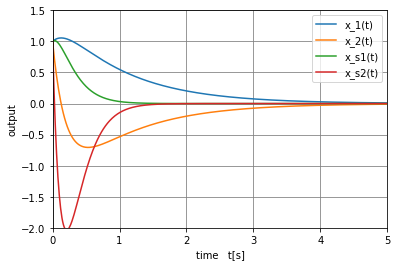

In [8]:
# 図12.2(a)の描画
plt.plot(te1, e_s_s1[:,0], label = "x_1(t)")#併合システムにおける{x}_{1}を抽出してplotする
plt.plot(te1, e_s_s1[:,1], label = "x_2(t)")#併合システムにおける{x}_{2}を抽出してplotする
plt.plot(t_s_fbk, y_s_fbk[:,0], label = "x_s1(t)")#状態フィードバックにおけるx_{1}を抽出してplotする
plt.plot(t_s_fbk, y_s_fbk[:,1], label = "x_s2(t)")#状態フィードバックにおけるx_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-2.0, 1.5]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

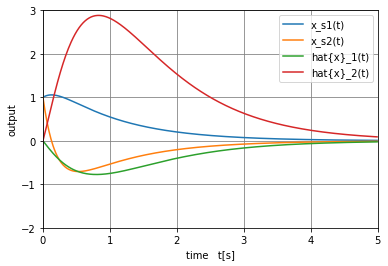

In [9]:
# 図12.2(b)の描画
plt.plot(te1, e_s_s1[:,0], label = "x_s1(t)")#状態フィードバックにおけるx_{1}を抽出してplotする
plt.plot(te1, e_s_s1[:,1], label = "x_s2(t)")#状態フィードバックにおけるx_{2}を抽出してplotする
plt.plot(te1, h_x_1_1, label = "hat{x}_1(t)")#併合システムにおける{x}_{1}を抽出してplotする
plt.plot(te1, h_x_1_2, label = "hat{x}_2(t)")#併合システムにおける{x}_{2}を抽出してplotする
plt.xlim([0,5]) #横軸（時間軸）の範囲の指定
plt.ylim([-2.0, 3.0]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示